<a href="https://colab.research.google.com/github/rohitpaul23/kaggleAssign/blob/main/mobile_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet


     |████████████████████████████████| 68 kB 4.0 MB/s 
     |████████████████████████████████| 192.9 MB 74 kB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 2.0 MB 36.8 MB/s 


In [2]:
import os
import opendatasets as od
import pandas as pd
import numpy as np

In [3]:
od.download('https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rohitpaul23
Your Kaggle Key: ··········


100%|██████████| 70.6k/70.6k [00:00<00:00, 11.6MB/s]

In [4]:
os.listdir('mobile-price-classification')

['test.csv', 'train.csv']

In [5]:
train_df = pd.read_csv('./mobile-price-classification/train.csv')
test_df = pd.read_csv('./mobile-price-classification/test.csv')

In [6]:
train_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
corrMat = train_df.corr()
corrMat

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [9]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Whether size of a screen defined a mobile's price range

In [10]:
corrMat['sc_h']['price_range'], corrMat['sc_w']['price_range']

(0.022986073167424327, 0.03871127166448414)

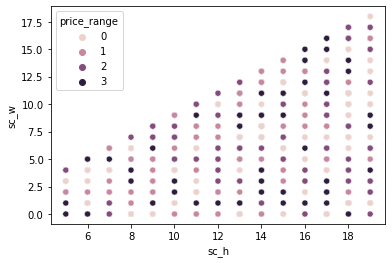

In [11]:
sns.scatterplot(x = train_df['sc_h'], y = train_df['sc_w'], hue = train_df['price_range'])

As the price range are all scattered and with correlation value it can be said that price range doesn't affected by screen size.
But at same time we can say that screen size(height and width) are itself correlated to each other. 

In [12]:
corrMat['sc_h']['sc_w']

0.5061442083433548

In [13]:
h_list = np.unique(train_df['sc_h'])

In [14]:
h_list

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [15]:
w_list = []
for h in h_list:
  w = np.max(train_df[train_df['sc_h'] == h]['sc_w'])
  w_list.append(w)
np.array(w_list)

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

Screen height is correlated to its screen width where 
***screen_width <= screen_height - 1***

# What about Pixel size ?

In [16]:
corrMat['px_height']['price_range'], corrMat['px_width']['price_range']

(0.148857555000422, 0.16581750172625534)

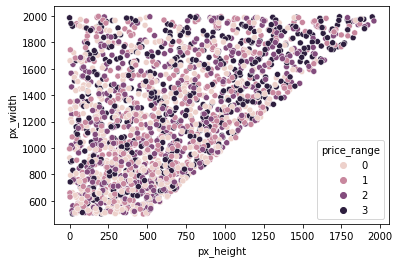

In [17]:
sns.scatterplot(x = train_df['px_height'], y = train_df['px_width'], hue = train_df['price_range'])

Compare to screen size, pixel ratio or size does affect the price range. As per the graph their is more number of black spot(represent higher range mobile) in top right comparing to bottom left.

Whereas the display resolution(width X height) is always greater than equal to 1

## Looking at correlation matrix

In [18]:
corrMat['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

Top three features that affect the price range based on Correlation matrix are:
1. RAM - 0.917
2. Battery power - 0.201
3. Pixel-width and pixel-height - 0.166 and 0.149 

In [19]:
px.histogram(train_df, 
             x='ram', 
             title='RAM vs. Price Range', 
             color='price_range',
             marginal = 'rug',
             hover_data = train_df.columns)

In [20]:
px.histogram(train_df, 
             x='battery_power', 
             title='RAM vs. Battery Power', 
             color='price_range',
             marginal = 'rug',
             hover_data = train_df.columns)

Based on the histogram, correlation justified as price range is hugely dependent on RAM, whereas for battery power it can be seen in the graph that lower range phone(in purple) have low battery comparred to high range mobile(in green)

## Training the data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
input_col = train_df.columns[:-1]
target_col = train_df.columns[-1]
train_inputs = train_df[input_col]
train_targets = train_df[target_col]

In [23]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(train_inputs, train_targets, test_size = 0.15, random_state = 5)

In [24]:
train_inputs.shape

(1700, 20)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier(n_jobs=-1, random_state=35)

In [27]:
model.fit(train_inputs, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=35)

In [28]:
model.score(train_inputs, train_targets)

1.0

In [29]:
model.score(val_inputs, val_targets)

0.9033333333333333

### Hyper Parameter Tuning

In [30]:
def test_params(**params):
    model = RandomForestClassifier(random_state=35, n_jobs=-1, **params).fit(train_inputs, train_targets)
    return model.score(train_inputs, train_targets), model.score(val_inputs, val_targets)

In [31]:
def test_param_and_plot(param_name, param_values, **params):
    train_errors, val_errors = [], [] 
    
    for value in param_values:
        newparams = {param_name: value}
        for para in params:
          newparams[para] = params[para]
        train_rmse, val_rmse = test_params(**newparams)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [32]:
test_params()

(1.0, 0.9033333333333333)

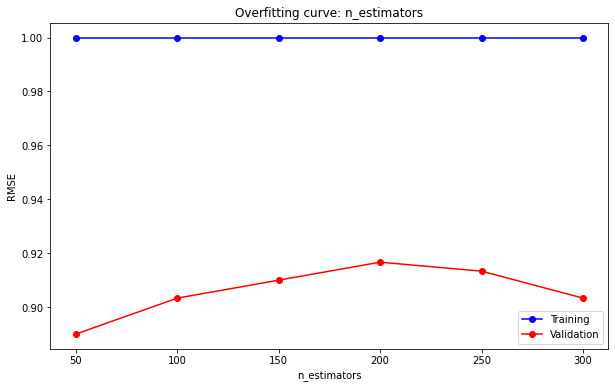

In [33]:
test_param_and_plot('n_estimators', [50, 100, 150, 200, 250, 300])

In [34]:
test_params(n_estimators = 200)

(1.0, 0.9166666666666666)

Optimal Value for n_estmators is 200

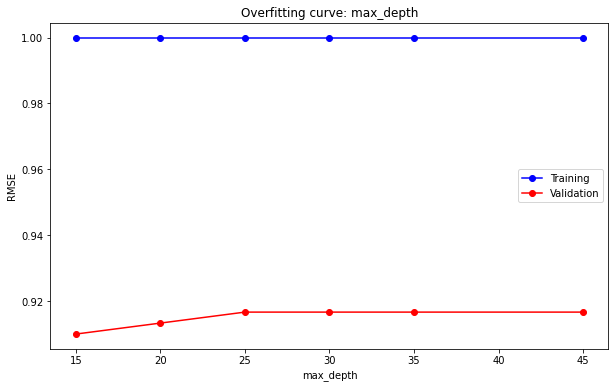

In [35]:
test_param_and_plot('max_depth', [15, 20, 25, 30, 35, 45], n_estimators = 200)

In [36]:
test_params(n_estimators = 200, max_depth = 25)

(1.0, 0.9166666666666666)

Optimal Value for max_depth is 25

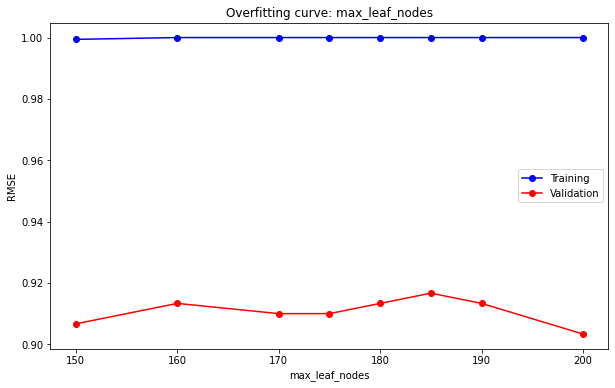

In [37]:
test_param_and_plot('max_leaf_nodes', [150, 160, 170, 175, 180, 185, 190, 200], n_estimators = 200, max_depth = 25)

In [38]:
test_params(n_estimators = 200, max_depth = 25, max_leaf_nodes = 185)

(1.0, 0.9166666666666666)

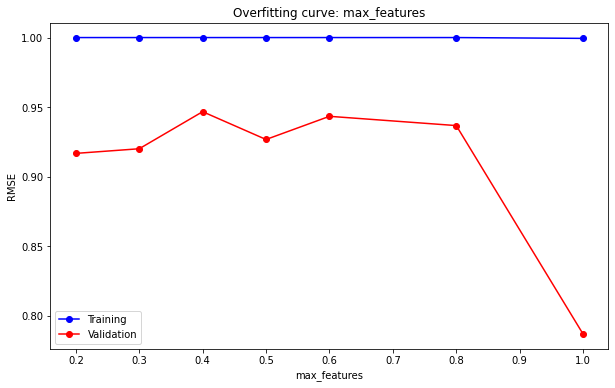

In [39]:
test_param_and_plot('max_features', [0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1], n_estimators = 200, max_depth = 25, max_leaf_nodes = 185)

In [40]:
test_params(n_estimators = 200, max_depth = 25, max_leaf_nodes = 185, max_features = 0.4)

(1.0, 0.9466666666666667)

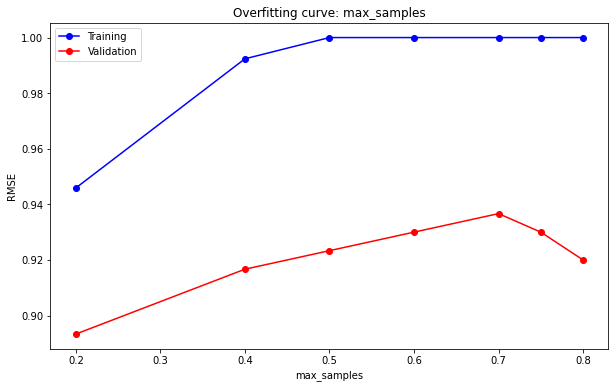

In [41]:
test_param_and_plot('max_samples', [0.2, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8], n_estimators = 200, max_depth = 25, max_leaf_nodes = 185, max_features = 0.4)

In [42]:
test_params(n_estimators = 200, max_depth = 25, max_leaf_nodes = 185, max_features = 0.4, max_samples = 0.7)

(1.0, 0.9366666666666666)

In [43]:
final_model = RandomForestClassifier(random_state=35, 
                                     n_jobs=-1, 
                                     n_estimators = 200,
                                     max_depth = 25,
                                     max_leaf_nodes = 185,
                                     max_features = 0.4)

In [44]:
final_model.fit(train_inputs, train_targets)

RandomForestClassifier(max_depth=25, max_features=0.4, max_leaf_nodes=185,
                       n_estimators=200, n_jobs=-1, random_state=35)

In [47]:
train_preds = final_model.predict(train_inputs)
val_preds = final_model.predict(val_inputs)

In [50]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train_targets, train_preds, squared = False)
val_mse = mean_squared_error(val_targets, val_preds, squared = False)

In [51]:
print('Train RMSE: {}, Validation RMSE: {}'.format(train_mse, val_mse))

Train RMSE: 0.0, Validation RMSE: 0.23094010767585033


In [52]:
train_score = final_model.score(train_inputs, train_targets)
val_score = final_model.score(val_inputs, val_targets)

print('Train Score: {}, Validation Score: {}'.format(train_score, val_score))

Train Score: 1.0, Validation Score: 0.9466666666666667


By using the optimal hyperparameter from random forest classifier, we are able to get an validation set accuracy of 94.66%

In [53]:
final_model_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

In [54]:
final_model_importance_df

,feature,importance
13,ram,0.620710
0,battery_power,0.092498
12,px_width,0.056269
11,px_height,0.055988
8,mobile_wt,0.024863
6,int_memory,0.019894
16,talk_time,0.016150
15,sc_w,0.015759
10,pc,0.015053
14,sc_h,0.014539


Based on the model fitting, top features affecting the mobile price- 

Top 5 features affecting mobile price:
  1. RAM
  2. Battery Power
  3. Pixel Width
  4. Pixel Height
  5. Mobile Weight

Bottom 5 features affecting mobile price:
  1. Touch Screen
  2. 3G
  3. 4G
  4. Bluetooth
  5. wifi



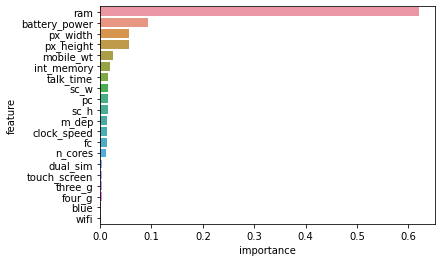

In [55]:
sns.barplot(data=final_model_importance_df, x='importance', y='feature')

## Making Prediction on Test Case

In [72]:
test_inputs = test_df[train_inputs.columns]

In [73]:
test_inputs.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [71]:
train_inputs.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [75]:
test_preds = final_model.predict(test_inputs)

In [76]:
test_preds

array([2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3, 1, 1,
       3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0, 0, 1,
       0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1, 1, 3,
       1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1, 3, 0,
       1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3, 3, 3,
       1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 2, 1, 1,
       3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0, 3, 2,
       3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2, 2, 3,
       1, 2, 3, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3, 2, 3,
       3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0, 0, 2,
       1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2, 3, 3,
       3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3, 3, 2,
       1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1, 0, 0,

## Saving the Model

In [77]:
import joblib

In [80]:
mobile_prices_model = {
    'model': final_model,
    'input_cols': train_inputs.columns,
    'target_col': train_df.columns[-1]
}

In [81]:
joblib.dump(mobile_prices_model, 'model_prices_model.joblib')

['model_prices_model.joblib']